# Importación de librerías


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules

# Limpieza de datos

## 1. Inspección inicial

Cargamos el archivo Emergencias.csv y realizamos una inspección inicial para comprender la estructura del dataset. 

Esto incluyó:

- Observar las primeras filas del dataset.
- Verificar los tipos de datos de cada columna.
- Revisar si había valores nulos

In [ ]:
# Cargar el archivo CSV
df = pd.read_csv('../data/Emergencias.csv')

# Inspección inicial del dataset
print("Primeras filas del dataset:")
display(df.head())

print("\nInformación general del dataset:")
df.info()

print("\nEstadísticas descriptivas:")
display(df.describe())

## 2 Manejo de valores nulos
Detectamos que algunas columnas contenían valores nulos. Para resolver esto:

Rellenamos los valores faltantes en las columnas numéricas utilizando la mediana, ya que esta medida es menos sensible a valores atípicos.
Esto asegura que los datos sean consistentes sin introducir sesgos significativos.

In [ ]:
# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Manejar valores nulos (ejemplo: rellenar con la mediana o eliminar)
df = df.fillna(df.median(numeric_only=True))  # Rellenar valores numéricos con la mediana

## 3. Análisis exploratorio
...


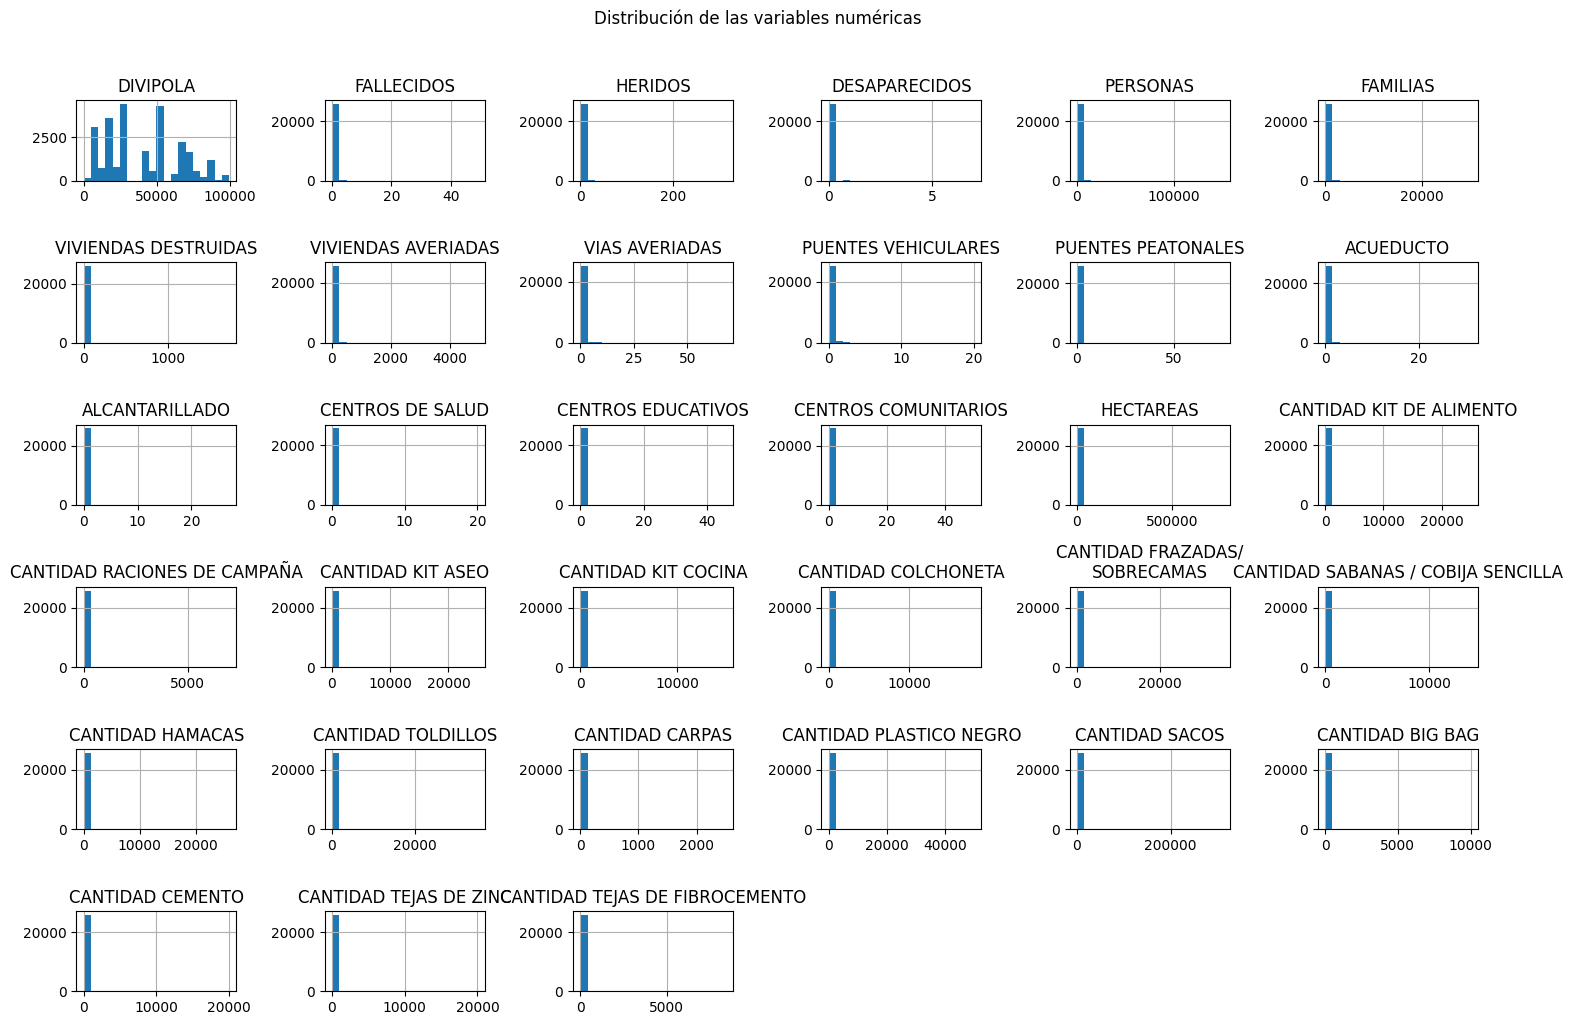

In [6]:
# Distribución de las variables numéricas
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribución de las variables numéricas", y=1.02)  # Ajustar el título para que no se superponga
plt.tight_layout()  # Optimizar el espacio entre las gráficas
plt.show()

# 4. Preparación de dataset

Eliminamos las variables que no son relevantes

In [7]:
# Eliminamos las columnas
del(df["DIVIPOLA"])
del(df["VALOR SACOS"])
del(df["VALOR BIG BAG"])
del(df["DESCRIPCION MATERIALES DE CONSTRUCCION"])
del(df["VALOR CEMENTO"])
del(df[f"VALOR TEJAS DE ZINC"])
del(df[f"VALOR TEJAS DE FIBROCEMENTO"])
del(df["VALOR PLASTICO NEGRO"])
del(df["VALOR HAMACAS"])
del(df["VALOR TOLDILLOS"])
del(df["VALOR CARPAS"])
del(df["VALOR SABANAS / COBIJA SENCILLA"])
del(df["VALOR FRAZADAS/SOBRECAMAS"])
del(df["VALOR COLCHONETA"])
del(df["VALOR KIT COCINA"])
del(df["VALOR KIT ASEO"])
del(df["VALOR KIT DE ALIMENTO"])
del(df["VALOR RACIONES DE CAMPAÑA"])
del(df["VALOR TOTAL ASISTENCIA NO ALIMENTARIA"])
del(df["CARROTANQUES - MOTOBOMBAS-PLANTA POTABILIZADORA"])
del(df["RETROEXCAVADORA"])
del(df["VALOR MATERIALES DE CONSTRUCCION"])
del(df["OTROS"])

In [ ]:
df.head()

In [39]:
df.columns

Index(['FECHA', 'DEPARTAMENTO', 'MUNICIPIO', 'EVENTO', 'FALLECIDOS', 'HERIDOS',
       'DESAPARECIDOS', 'PERSONAS', 'FAMILIAS', 'VIVIENDAS DESTRUIDAS',
       'VIVIENDAS AVERIADAS', 'VIAS AVERIADAS', 'PUENTES VEHICULARES',
       'PUENTES PEATONALES', 'ACUEDUCTO', 'ALCANTARILLADO', 'CENTROS DE SALUD',
       'CENTROS EDUCATIVOS', 'CENTROS COMUNITARIOS', 'HECTAREAS',
       'OTROS-AFECTACION', 'SUBSIDIO DE ARRIENDO', 'ASISTENCIA NO ALIMENTARIA',
       'APOYO ALIMENTARIO', 'MATERIALES CONSTRUCCION', 'SACOS - BIGBAG',
       'OBRAS DE EMERGENCIA', 'APOYO AEREO / TERRESTRE',
       'FIC / TRANSFERENCIAS ECONOMICAS', 'INFRAESCTRUCTURA TECNOLOGICA',
       'RECURSOS EJECUTADOS', 'CANTIDAD KIT DE ALIMENTO',
       'CANTIDAD RACIONES DE CAMPAÑA', 'CANTIDAD KIT ASEO',
       'CANTIDAD KIT COCINA', 'CANTIDAD COLCHONETA',
       'CANTIDAD FRAZADAS/\nSOBRECAMAS', 'CANTIDAD SABANAS / COBIJA SENCILLA',
       'CANTIDAD HAMACAS', 'CANTIDAD TOLDILLOS', 'CANTIDAD CARPAS',
       'CANTIDAD PLASTICO NEG

# 5. Análisis con clustering

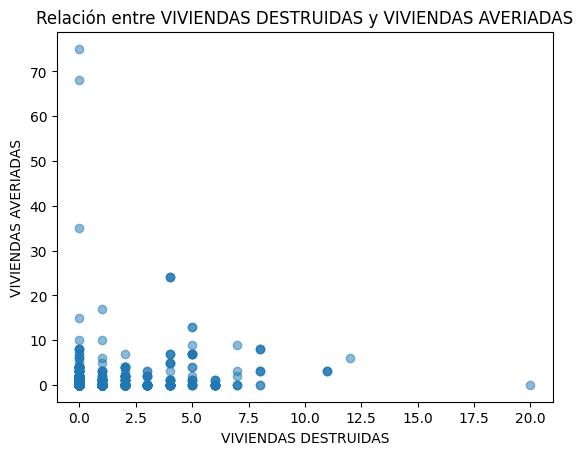

In [48]:
# Ejemplo: Visualizar la relación entre dos variables
plt.scatter(df['PUENTES VEHICULARES'], df['PUENTES PEATONALES'], alpha=0.5)
plt.title('Relación entre VIVIENDAS DESTRUIDAS y VIVIENDAS AVERIADAS')
plt.xlabel('VIVIENDAS DESTRUIDAS')
plt.ylabel('VIVIENDAS AVERIADAS')
plt.show()

## 5.1 Revisión de clústeres con DBSCAN

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


#Estructuramos el dataset como un dataframe
df = pd.DataFrame(df)

# Se estructuran los datos y se preparan para que sean analizados adecuadamente
#analizados por el algoritmo (numerizacion, normalizacion,etc.)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['FALLECIDOS', 'FAMILIAS']])


#Epsilon: La distancia máxima entre dos muestras para que una se considere vecina de la otra

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)  # eps (espsilon): tamaño del radio (por defecto es 0,5), min_samples: puntos mínimos para formar un cluster
#Se ejecuta y los resultados se almacenan en el dataframe original en un nuevo atributo
df['Cluster'] = dbscan.fit_predict(scaled_features)

# Mostrar los resultados
print("Datos con Clusters asignados por DBSCAN:")
print(df)

# Visualizar los clusters
plt.scatter(df['PERSONAS'], df['FAMILIAS'], c=df['Cluster'], cmap='viridis')
plt.title('Clustering con DBSCAN')
plt.xlabel('PERSONAS')
plt.ylabel('FAMILIAS')
plt.show()


Con cobweb


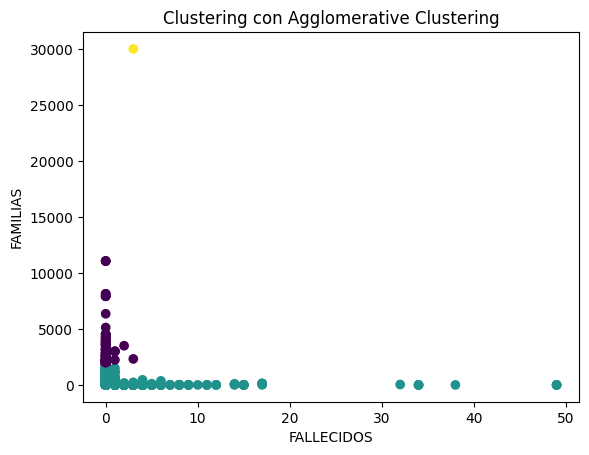

In [8]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Seleccionar las variables para clustering
data = df[['FALLECIDOS', 'FAMILIAS']].values

# Aplicar Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=3)  # Cambia el número de clústeres según sea necesario
df['Cluster'] = clustering.fit_predict(data)

# Visualizar los resultados
plt.scatter(df['FALLECIDOS'], df['FAMILIAS'], c=df['Cluster'], cmap='viridis')
plt.title('Clustering con Agglomerative Clustering')
plt.xlabel('FALLECIDOS')
plt.ylabel('FAMILIAS')
plt.show()

## 5.2 Aplicación de K means

Datos originales:
                    FECHA DEPARTAMENTO     MUNICIPIO  \
0  01/01/2019 12:00:00 AM    ANTIOQUIA  SAN JERONIMO   
1  01/01/2019 12:00:00 AM    RISARALDA      MARSELLA   
2  01/01/2019 12:00:00 AM    ANTIOQUIA          ANZA   
3  01/01/2019 12:00:00 AM    ANTIOQUIA    MONTEBELLO   
4  01/01/2019 12:00:00 AM    ANTIOQUIA      CAUCASIA   

                          EVENTO  DIVIPOLA  FALLECIDOS  HERIDOS  \
0           INCENDIO ESTRUCTURAL      5656           0        0   
1                      INMERSION     66440           1        0   
2  INCENDIO DE COBERTURA VEGETAL      5044           0        0   
3  INCENDIO DE COBERTURA VEGETAL      5467           0        0   
4           INCENDIO ESTRUCTURAL      5154           0        1   

   DESAPARECIDOS  PERSONAS  FAMILIAS  ...  CANTIDAD PLASTICO NEGRO  \
0              0         5         1  ...                        0   
1              0         1         0  ...                        0   
2              0         0      

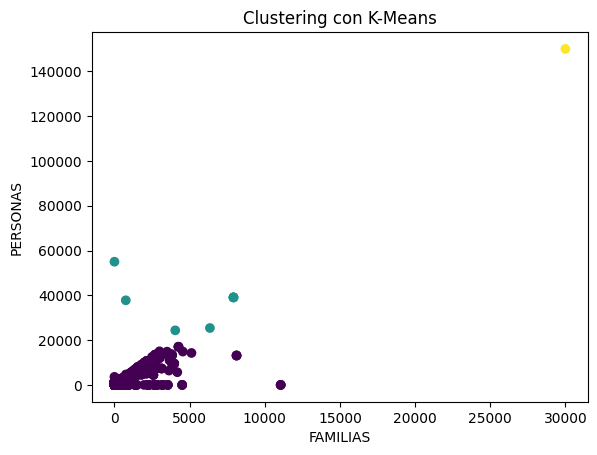

In [ ]:

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Supongamos que df ya está cargado
print("Datos originales:")
print(df.head())


# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['FAMILIAS', 'PERSONAS']])

# Resultados
print("\nDatos con Clusters:")
print(df.head())

# Visualización
plt.scatter(df['FAMILIAS'], df['PERSONAS'], c=df['Cluster'], cmap='viridis')
plt.title('Clustering con K-Means')
plt.xlabel('FAMILIAS')
plt.ylabel('PERSONAS')
plt.show()

In [ ]:
conteo_eventos = df["EVENTO"].value_counts()
print(conteo_eventos)

EVENTO
INCENDIO DE COBERTURA VEGETAL                  7634
MOVIMIENTO EN MASA                             6103
INUNDACION                                     4430
VENDAVAL                                       1707
INCENDIO ESTRUCTURAL                           1524
CRECIENTE SUBITA                               1422
TEMPORAL                                        656
AVENIDA TORRENCIAL                              557
COLAPSO ESTRUCTURAL                             314
ACCIDENTE TRANSPORTE TERRESTRE                  227
ACCIDENTE MINERO                                197
GRANIZADA                                       152
ACCIDENTE TRANSPORTE MARITIMO O FLUVIAL          94
INMERSION                                        91
SEQUIA                                           89
CASO FORTUITO                                    83
ACCIDENTE TRANSPORTE AEREO                       75
EXPLOSION                                        73
LLUVIAS                                          70
EROSI

In [ ]:
conteo_eventos = df["EVENTO"].value_counts()
print(df["FAMILIAS"].unique())

[    1     0     3     2    55    12    31     6   379     9    45     8
     4     5    47    16    15  1200   178   220   106  1800   400    53
   655    14    20    33   340   427    17     7    72    74   675    10
    13   300    32    23    27    28    52    66    85    11    97    21
    58    60    69    99   116   107    22    41    64   144    48    35
  2066   757    40    34   150    18    19   192  1487    67   263    30
    37  3628   138   268  1702    80   520    56    70   818   118   224
    25    50    63   376   495    46   100   292    84  1060   700   170
  1225   600    94   230    87   931   279  2500  2061   152    24   335
   197   411   713   310   137   277   706  1423    39   756   409   583
   240   602   250   200   313   297  1012   247  1300   900  1236    43
   162    68   308   321    90   159   190   251   155    42    36   130
   153   450   120    82   458   269   140  1500    96   513    59    62
   171    54   210    44    88   180   530   131   

# Regla de asociación



**Explicacion Reglas de Asociasion para nuestro caso**

Para entender un poco mas el resultado vamos a desglosar cada una de sus partes:



*   Antecedents (Condición previa): Son los eventos que ocurren primero (izquierda de la regla).
*   Consequents (Resultado esperado): Son los eventos que ocurren después (derecha de la regla).


*   Support (Soporte): Indica qué porcentaje de los datos contiene tanto los antecedentes como los consecuentes.
*   Confidence (Confianza): Es la probabilidad de que si ocurre el antecedente, también ocurra el consecuente.


*   Lift (Elevación): Mide qué tan fuerte es la relación en comparación con una ocurrencia aleatoria. Un lift > 1 indica una relación fuerte.















**Para nuestro dataset se aplicaron algunos cambios**




1.   Se filtraron las reglas para generar una mayor confianza, ahora contamos con reglas donde la probabilidad de que ocurra el consecuente es alta
2.   Contamos con un lift mas alto, indicando que la relacion no es aleatoria, si no que existe una correlacion mas fuerte entre los eventos
3. Al contar con un soporte mas bajo , aparecen relaciones mas especificas y relevantes





**¿ Por que la eleccion de estas columnas ?**

Seleccionamos las columnas que representan afectaciones a infraestructuras clave y servicios básicos en emergencias. Eliminamos columnas irrelevantes como valores monetarios y nombres de materiales, porque no aportan información útil para la identificación de patrones de afectación.

Las columnas elegidas reflejan daños en viviendas, educación, infraestructura vial y servicios básicos (acueducto). Esto permite identificar relaciones entre diferentes tipos de afectaciones y cómo se combinan en situaciones de emergencia.

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules



# Seleccion de columnas relevantes para nuestra regla de asociacion
columnas_utiles = [
    "CENTROS EDUCATIVOS",
    "VIAS AVERIADAS", "PUENTES VEHICULARES", "ACUEDUCTO","FALLECIDOS"
]
df_seleccionado = df[columnas_utiles]

# Convertir datos numéricos a valores booleanos
df_binario = df_seleccionado > 0

# Aplicar Apriori con min_support más bajo
frequent_itemsets = apriori(df_binario, min_support=0.005, use_colnames=True)

# Generar reglas de asociación con confidence más alto
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.75)

# Filtrar solo reglas con lift > 1.5
rules = rules[rules['lift'] > 1.5]

# Mostrar reglas finales
print("\nReglas de Asociación Filtradas:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])




Reglas de Asociación Filtradas:
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


**Interpretacion de las reglas generadas**

**Regla 1:**
(VIVIENDAS DESTRUIDAS, ACUEDUCTO) → (VIVIENDAS AVERIADAS)

Cuando hay viviendas completamente destruidas y fallas en el suministro de agua potable, hay una alta probabilidad (81%) de que también haya viviendas con daños estructurales (no completamente destruidas, pero afectadas).

Lift = 2.27: Esto significa que esta relación es más del doble de probable que si fuera un evento aleatorio.

**Regla 2:**
(CENTROS EDUCATIVOS, VIAS AVERIADAS) → (VIVIENDAS AVERIADAS)

Si se ven afectados centros educativos y hay daños en las vías, hay una alta probabilidad (79%) de que también haya viviendas afectadas.

Explicación: Esto sugiere que las emergencias que afectan infraestructuras públicas como escuelas y carreteras también impactan zonas residenciales cercanas.

Lift = 2.22: La probabilidad de que esta relación ocurra es más del doble de lo esperado al azar.


**Regla 3:**
(CENTROS EDUCATIVOS, ACUEDUCTO) → (VIVIENDAS AVERIADAS)

Cuando los centros educativos y el acueducto fallan, hay una probabilidad del 81% de que también haya viviendas averiadas.

Explicación: Un colapso en los servicios esenciales como agua potable y educación suele ocurrir en zonas densamente pobladas, lo que aumenta el impacto en viviendas.

Lift = 2.27: Esto indica que esta combinación de afectaciones es significativamente relevante.

**Regla 4:**
(VIVIENDAS DESTRUIDAS, ACUEDUCTO) → (VIAS AVERIADAS)

Cuando hay viviendas destruidas y fallas en el acueducto, hay una probabilidad del 75% de que también haya daños en la infraestructura vial.

Explicación: Eventos como inundaciones o terremotos pueden afectar viviendas, redes de agua y carreteras al mismo tiempo, lo que genera esta fuerte relación.

Lift = 3.91: Este es el lift más alto, lo que indica que esta relación es casi cuatro veces más probable de lo que sería por azar.